In [1]:
#1. Generate a list of 100 integers containing values between 90 to 130 and store it in the variable `int_list`.After generating the list, find the following:
import numpy as np
import statistics as stats
int_list = list(np.random.randint(90,130,100))
# (i) Write a Python function to calculate the mean of a given list of numbers. and Create a function to find the median of a list of numbers.
def mean(int_list):
    return np.mean(int_list)

def median(int_list):
    return np.median(int_list)

# (ii) Develop a program to compute the mode of a list of integers.

def mode(int_list):
    return stats.multimode(int_list)

# (iii) Implement a function to calculate the weighted mean of a list of values and their corresponding weights.

def weighted_mean_(values, weights):
    return np.average(values, weights=weights)

# (iv) Write a Python function to find the geometric mean of a list of positive numbers.
def geometric_mean(int_list):
    return stats.geometric_mean(int_list)

# (v) Create a program to calculate the harmonic mean of a list of values.
def  harmonic_mean(int_list):
    return stats.harmonic_mean(int_list)
# (vi) Build a function to determine the midrange of a list of numbers (average of the minimum and maximum).
def midrange(int_list):
    return (min(int_list) + max(int_list)) / 2
# (vii) Implement a Python program to find the trimmed mean of a list, excluding a certain percentage of outliers.
def trimmed_mean(int_list, trim_percent):
    if not 0 <= trim_percent < 0.5:
        raise ValueError("Trim percent must be between 0 and 0.5.")
    
    n = len(int_list)
    k = int(n * trim_percent)
    sorted_nums = sorted(int_list)
    trimmed = sorted_nums[k:n - k]
    
    return stats.mean(trimmed)



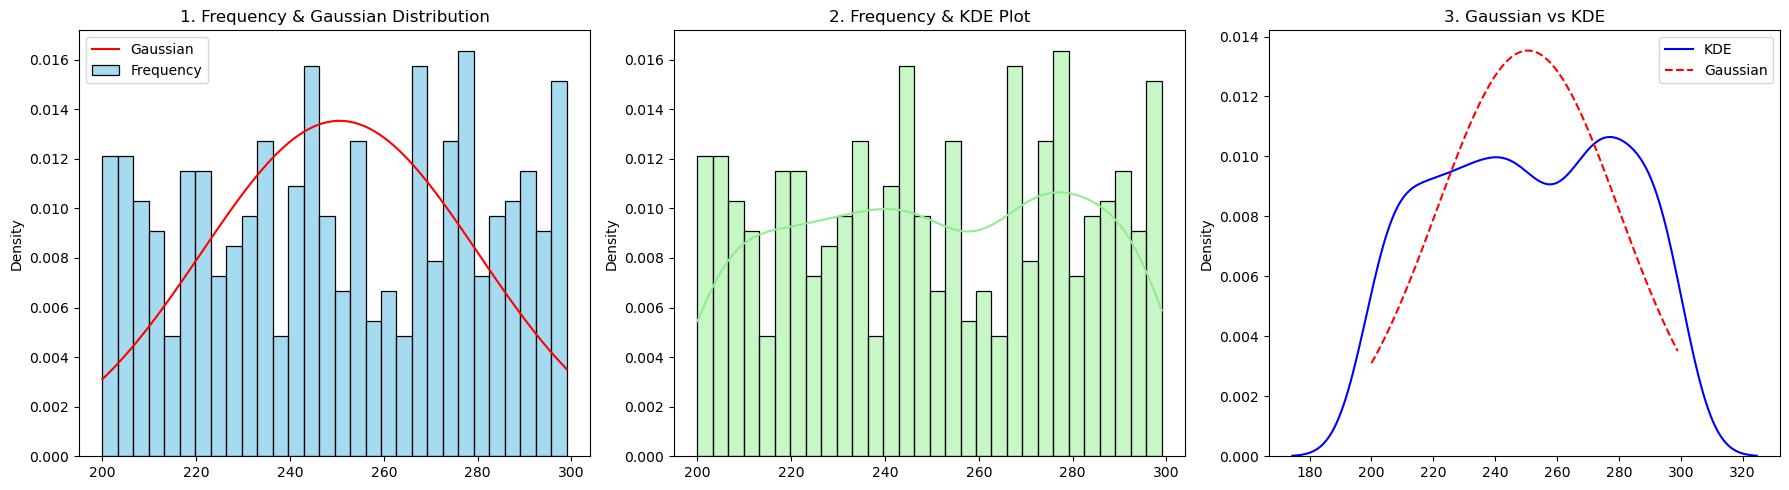

In [2]:
#2. Generate a list of 500 integers containing values between 200 to 300 and store it in the variable `int_list2`.After generating the list, find the following:
import numpy as np
import statistics

int_list2 = np.random.randint(200,300,500)
# (i) Compare the given list of visualization for the given data:
# 1. Frequency & Gaussian distribution
# 2. Frequency smoothened KDE plot
# 3. Gaussian distribution & smoothened KDE plot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm

def visualize_data_distribution(data):
    plt.figure(figsize=(18, 5))

    # Histogram + Gaussian
    plt.subplot(1, 3, 1)
    sns.histplot(data, bins=30, kde=False, color='skyblue', stat='density', label="Frequency")
    mu, std = np.mean(data), np.std(data)
    xmin, xmax = min(data), max(data)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', label='Gaussian')
    plt.title("1. Frequency & Gaussian Distribution")
    plt.legend()

    # Histogram + KDE
    plt.subplot(1, 3, 2)
    sns.histplot(data, bins=30, kde=True, color='lightgreen', stat='density')
    plt.title("2. Frequency & KDE Plot")

    # Gaussian vs KDE
    plt.subplot(1, 3, 3)
    sns.kdeplot(data, label='KDE', color='blue')
    plt.plot(x, p, 'r', linestyle='--', label='Gaussian')
    plt.title("3. Gaussian vs KDE")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the visualization
visualize_data_distribution(int_list2)



# (ii) Write a Python function to calculate the range of a given list of numbers.
def data_range(int_list2):
    return max(int_list2) - min(int_list2)

# (iii) Create a program to find the variance and standard deviation of a list of numbers.
import statistics

def variance_std(int_list2):
    var = statistics.variance(int_list2)
    std = statistics.stdev(int_list2)
    return var, std

# (iv) Implement a function to compute the interquartile range (IQR) of a list of values.

def interquartile_range(int_list2):
    q3 = np.percentile(int_list2, 75)
    q1 = np.percentile(int_list2, 25)
    return q3 - q1

# (v) Build a program to calculate the coefficient of variation for a dataset.
def coefficient_of_variation(int_list2):
    mean = statistics.mean(int_list2)
    std_dev = statistics.stdev(int_list2)
    return (std_dev / mean) * 100

# (vi) Write a Python function to find the mean absolute deviation (MAD) of a list of numbers.
def mean_absolute_deviation(int_list2):
    mean = statistics.mean(int_list2)
    return sum(abs(x - mean) for x in int_list2) / len(int_list2)

# (vii) Create a program to calculate the quartile deviation of a list of values.
def quartile_deviation(int_list2):
    q3 = np.percentile(int_list2, 75)
    q1 = np.percentile(int_list2, 25)
    return (q3 - q1) / 2

# (viii) Implement a function to find the range-based coefficient of dispersion for a dataset.
def range_coefficient_dispersion(int_list2):
    max_val = max(int_list2)
    min_val = min(int_list2)
    return (max_val - min_val) / (max_val + min_val)


In [3]:
#3.Write a Python class representing a discrete random variable with methods to calculate its expected value and variance.
class DiscreteRandomVariable:
    def __init__(self, outcomes, probabilities):
        if len(outcomes) != len(probabilities):
            raise ValueError("Outcomes and probabilities must be same length.")
        if not abs(sum(probabilities) - 1.0) < 1:
            raise ValueError("Probabilities must sum to 1.")
        self.outcomes = outcomes
        self.probabilities = probabilities

    def expected_value(self):
        return sum(x * p for x, p in zip(self.outcomes, self.probabilities))

    def variance(self):
        mean = self.expected_value()
        return sum(((x - mean) ** 2) * p for x, p in zip(self.outcomes, self.probabilities))


In [4]:
#4. Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.
import numpy as np
import statistics

def simulate_die_rolls(n=10000):
    rolls = list(np.random.randint(1, 6))
    mean = statistics.mean(rolls)
    variance = statistics.variance(rolls)  
    return mean, variance


In [5]:
#5.Create a Python function to generate random samples from a given probability distribution (e.g.,binomial, Poisson) and calculate their mean and variance.
import numpy as np 

def sample_and_analyze(dist='binomial', size=1000, **kwargs):
    if dist == 'binomial':
        samples = np.random.binomial(n=kwargs.get('n', 10), p=kwargs.get('p', 0.5), size=size)
    elif dist == 'poisson':
        samples = np.random.poisson(lam=kwargs.get('lam', 3), size=size)
    else:
        raise ValueError("Supported: binomial, poisson")

    mean = statistics.mean(samples)
    variance = statistics.variance(samples)
    return mean, variance


In [6]:
#6. Write a Python script to generate random numbers from a Gaussiandistribution and compute the mean, variance, and standard deviation of the samples.
def gaussian_sample_analysis(mean=0, stddev=1, size=1000):
    samples = [random.gauss(mean, stddev) for i in range(size)]
    sample_mean = statistics.mean(samples)
    sample_var = statistics.variance(samples)
    sample_std = statistics.stdev(samples)
    return sample_mean, sample_var, sample_std


In [7]:
# 7.Use seaborn library to load tips dataset. Find the following from the dataset for the columns total_bill and tip's:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

# (i) Write a Python function that calculates their skewness.
from scipy.stats import skew
def calculate_skewness(data_column):
    return skew(data_column)

# (ii) Create a program that determines whether the columns exhibit positive skewness, negative skewness, or is approximately symmetric.
def skewness_type(skew_value):
    if skew_value > 0:
        return "Positively skewed"
    elif skew_value < 0:
        return "Negatively skewed"
    else:
        return "Approximately symmetric"


# (iii) Write a function that calculates the covariance between two columns.
def calculate_covariance(col1, col2):
    return col1.cov(col2)

# (iv) Implement a Python program that calculates the Pearson correlation coefficient between two columns.
def calculate_pearson_correlation(col1, col2):
    return col1.corr(col2, method='pearson')

# (v) Write a script to visualize the correlation between two specific columns in a Pandas DataFrame using scatter plots.

def plot_scatter(df, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col1, y=col2)
    plt.title(f"Scatter Plot: {col1} vs {col2}")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()


In [8]:
#8. Write a Python function to calculate the probability density function (PDF) of a continuous random variable for a given normal distribution.
import math

def normal_pdf(x, mean=0, std=1):
    coefficient = 1 / (std * math.sqrt(2 * math.pi))
    exponent = math.exp(-0.5 * ((x - mean) / std) ** 2)
    return coefficient * exponent


In [9]:
#9.Create a program to calculate the cumulative distribution function (CDF) of exponential distribution.

import math

def exponential_cdf(x, lambd):
    if x < 0:
        return 0.0
    return 1 - math.exp(-lambd * x)


In [10]:
#10. Write a Python function to calculate the probability mass function (PMF) of Poisson distribution.

import math

def poisson_pmf(k, lambd):
    if k < 0 or (int(k) != k):
        return 0 
    return (lambd ** k * math.exp(-lambd)) / math.factorial(k)


In [11]:
#11. A company wants to test if a new website layout leads to a higher conversion rate (percentage of visitors who make a purchase). They collect data from the old and new layouts to compare.

import numpy as np
from scipy.stats import norm


x1, n1 = 50, 1000   # old layout
x2, n2 = 70, 1000   # new layout

p1 = x1 / n1
p2 = x2 / n2


p = (x1 + x2) / (n1 + n2)

SE = ((p * (1 - p)) * (1/n1 + 1/n2)) ** 0.5


z_stat = (p1 - p2) / SE

# Two-tailed p-value
p_val = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"p1 (old layout): {p1:.4f}")
print(f"p2 (new layout): {p2:.4f}")
print(f"Pooled proportion: {p:.4f}")
print(f"Standard Error: {SE:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Decision
alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant difference between layouts.")
else:
    print("Fail to reject H0 → No significant evidence that new layout is better.")


p1 (old layout): 0.0500
p2 (new layout): 0.0700
Pooled proportion: 0.0600
Standard Error: 0.0106
Z-statistic: -1.8831
P-value: 0.0597
Fail to reject H0 → No significant evidence that new layout is better.


In [12]:
#12.A tutoring service claims that its program improves students' exam scores. A sample of students who participated in the program was taken, and their scores before and after the program were recorded.

import numpy as np


before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program  = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

d = after_program - before_program
n = len(d)

mean_d = np.mean(d)
std_d = np.std(d)  

print("Differences:", d)
print("Mean difference:", mean_d)
print("Std deviation of differences:", std_d)


Differences: [ 5  5  5 10  2  2  3  2  3  1]
Mean difference: 3.8
Std deviation of differences: 2.4819347291981715


In [14]:
#13.A pharmaceutical company wants to determine if a new drug is effective in reducing blood pressure. They conduct a study and record blood pressure measurements before and after administering the drug.
import numpy as np
from scipy.stats import norm

before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

differences = before_drug - after_drug

mean_diff = np.mean(differences)
std_diff = np.std(differences)
n = len(differences)
standard_error = std_diff / np.sqrt(n)

z_score = mean_diff / standard_error

p_value = 1 - norm.cdf(z_score) # cumulative distribution function

# Print results
print(f"Mean Difference: {mean_diff:.2f}")
print(f"Standard Deviation of Differences: {std_diff:.2f}")
print(f"Standard Error: {standard_error:.2f}")
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion at alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The drug is effective in reducing blood pressure.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the drug is effective.")


In [17]:
#14.A customer service department claims that their average response time is less than 5 minutes. A sample of recent customer interactions was taken, and the response times were recorded.
import numpy as np
from scipy import stats

response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])
claimed_mean = 5

sample_mean = np.mean(response_times)
sample_std = np.std(response_times)
n = len(response_times)
standard_error = sample_std / np.sqrt(n)

z_score = (sample_mean - claimed_mean) / standard_error
p_value_z_test = stats.norm.cdf(z_score)

print("Z-Test Customer Service Response Time:")
print(f"  Z-Score: {z_score:.2f}, P-Value: {p_value_z_test:.4f}")


In [20]:
#15.A company is testing two different website layouts to see which one leads to higher click-through rates.
#Write a Python function to perform an A/B test analysis, including calculating the t-statistic, degrees of
#freedom, and p-value.

import numpy as np
from scipy import stats
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

t_stat_ab, p_val_ab = stats.ttest_ind(layout_b_clicks, layout_a_clicks)
print("A/B Test (Website Layouts):")
print(f"T-Statistic: {t_stat_ab:.2f}, P-Value: {p_val_ab:.4f}")

In [23]:
#16. A pharmaceutical company wants to determine if a new drug is more effective than an existing drug in
#reducing cholesterol levels. Create a program to analyze the clinical trial data and calculate the t-statistic and
#p-value for the treatment effect.

import numpy as np
from scipy import stats

existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

t_stat, p_value_two_tailed = stats.ttest_ind(existing_drug_levels, new_drug_levels)


p_value_one_tailed = p_value_two_tailed / 2

mean_existing = np.mean(existing_drug_levels)
mean_new = np.mean(new_drug_levels)

print(f"Mean (Existing Drug): {mean_existing}")
print(f"Mean (New Drug): {mean_new}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"One-Tailed P-Value: {p_value_one_tailed:.4f}")

# Conclusion at α = 0.05
alpha = 0.05
if (p_value_one_tailed < alpha) and (mean_new < mean_existing):
    print(" Result: Reject null hypothesis. The new drug is more effective.")
else:
    print("Result: Fail to reject null hypothesis. No significant evidence that the new drug is more effective.")


In [25]:
#17. A school district introduces an educational intervention program to improve math scores. Write a Python
# function to analyze pre- and post-intervention test scores, calculating the t-statistic and p-value to
# determine if the intervention had a significant impact.
import numpy as np
from scipy import stats
pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
def analyze_intervention(pre_scores, post_scores):
    t_statistic, p_value = stats.ttest_rel(post_scores, pre_scores)
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Result: The intervention had a statistically significant impact on scores.")
    else:
        print("Result: The intervention did NOT have a statistically significant impact on scores.")

analyze_intervention(pre_intervention_scores, post_intervention_scores)


In [27]:
#18.An HR department wants to investigate if there's a gender-based salary gap within the company. Develop
# a program to analyze salary data, calculate the t-statistic, and determine if there's a statistically
# significant difference between the average salaries of male and female employees.

import numpy as np
from scipy import stats

def analyze_salary_gap(male_salaries, female_salaries):
    t_statistic, p_value = stats.ttest_ind(male_salaries, female_salaries, equal_var=False)
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Result: There IS a statistically significant salary difference between genders.")
    else:
        print("Result: There is NO statistically significant salary difference between genders.")

np.random.seed(0)
male_salaries = np.random.normal(50000,10000, size=20)
female_salaries = np.random.normal(55000,9000, size=20)

analyze_salary_gap(male_salaries, female_salaries)


In [29]:
#19.A manufacturer produces two different versions of a product and wants to compare their quality scores.
# Create a Python function to analyze quality assessment data, calculate the t-statistic, and decide
# whether there's a significant difference in quality between the two versions.

version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]
from scipy import stats
import numpy as np
def analyze_quality_difference(version1_scores, version2_scores):
    t_statistic, p_value = stats.ttest_ind(version1_scores, version2_scores, equal_var=False)
    print("T-Statistic:",t_statistic)
    print("P-Value:",p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Result: There IS a statistically significant difference in quality between the two versions.")
    else:
        print("Result: There is NO statistically significant difference in quality between the two versions.")
analyze_quality_difference(version1_scores, version2_scores)



In [31]:
#20.A restaurant chain collects customer satisfaction scores for two different branches. Write a program to
# analyze the scores, calculate the t-statistic, and determine if there's a statistically significant difference in
# customer satisfaction between the branches.

from scipy import stats
import numpy as np
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

def analyze_branch_satisfaction(branch_a_scores, branch_b_scores):
    t_statistic, p_value = stats.ttest_ind(branch_a_scores, branch_b_scores, equal_var=False)
    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Result: There IS a statistically significant difference in customer satisfaction between the branches.")
    else:
        print("Result: There is NO statistically significant difference in customer satisfaction between the branches.")
analyze_branch_satisfaction(branch_a_scores, branch_b_scores)


In [33]:
#21. A political analyst wants to determine if there is a significant association between age groups and voter
# preferences (Candidate A or Candidate B). They collect data from a sample of 500 voters and classify
# them into different age groups and candidate preferences. Perform a Chi-Square test to determine if
# there is a significant association between age groups and voter preferences.

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
age_groups = np.random.choice(['18-30', '31-50', '51+'], size=30)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=30)
def analyze_voter_association(age_groups, voter_preferences):
    data = pd.DataFrame({'Age Group': age_groups, 'Voter Preference': voter_preferences})
    contingency_table = pd.crosstab(data['Age Group'], data['Voter Preference']) 
    print("Contingency Table:\n", contingency_table, "\n")
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print("Chi-Square Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Result: There IS a statistically significant association between age group and voter preference.")
    else:
        print("Result: There is NO statistically significant association between age group and voter preference.")

analyze_voter_association(age_groups, voter_preferences)


In [35]:
#22. A company conducted a customer satisfaction survey to determine if there is a significant relationship
# between product satisfaction levels (Satisfied, Neutral, Dissatisfied) and the region where customers are
# located (East, West, North, South). The survey data is summarized in a contingency table. Conduct a Chi-
# Square test to determine if there is a significant relationship between product satisfaction levels and customer regions.


import numpy as np
from scipy.stats import chi2_contingency

data = np.array([
    [50, 30, 40, 20],  
    [30, 40, 30, 50], 
    [20, 30, 40, 30]   
])

def chi_square_test(data):
    chi2, p_value, dof, expected = chi2_contingency(data)
    
    print("Chi-Square Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("P-Value:", p_value)
    print("\nExpected Frequencies:\n", expected)
    
    alpha = 0.05
    if p_value < alpha:
        print("\nResult: There IS a significant relationship between product satisfaction and customer region.")
    else:
        print("\nResult: There is NO significant relationship between product satisfaction and customer region.")
chi_square_test(data)


In [37]:
#23. A company implemented an employee training program to improve job performance (Effective, Neutral,
# Ineffective). After the training, they collected data from a sample of employees and classified them based
# on their job performance before and after the training. Perform a Chi-Square test to determine if there is a
# significant difference between job performance levels before and after the training.


import numpy as np
from scipy.stats import chi2_contingency

data = np.array([
    [50, 30, 20],  
    [30, 40, 30],  
    [20, 30, 40]   
])

def chi_square_test_job_performance(data):
    chi2, p_value, dof, expected = chi2_contingency(data)
    
    print("Chi-Square Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("P-Value:", p_value)
    print("\nExpected Frequencies:\n", expected)
    
    alpha = 0.05
    if p_value < alpha:
        print("\nResult: There IS a statistically significant difference in job performance levels before and after training.")
    else:
        print("\nResult: There is NO statistically significant difference in job performance levels before and after training.")

chi_square_test_job_performance(data)


In [39]:
# 24. A company produces three different versions of a product: Standard, Premium, and Deluxe. The
# company wants to determine if there is a significant difference in customer satisfaction scores among the
# three product versions. They conducted a survey and collected customer satisfaction scores for each
# version from a random sample of customers. Perform an ANOVA test to determine if there is a significant
# difference in customer satisfaction scores.

from scipy.stats import f_oneway
import numpy as np
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

def analyze_customer_satisfaction(standard, premium, deluxe):
    f_statistic, p_value = f_oneway(standard, premium, deluxe) 
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Result: There IS a statistically significant difference in customer satisfaction among the three product versions.")
    else:
        print("Result: There is NO statistically significant difference in customer satisfaction among the three product versions.")

analyze_customer_satisfaction(standard_scores, premium_scores, deluxe_scores)
